#### Processamento de Big Data: Projeto Final

Licenciatura em Ciência de Dados

CDB1

Marco Delgado Esperança, Nº 110451

Maria João Ferreira Lourenço, Nº 104716

Docente: João Oliveira

8 de abril de 2023

Flight Status Prediction

https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022

# Importação, transformação e limpeza dos dados

Este notebook contém a importação dos cinco ficheiros csv que decidimos trabalhar com, neste caso os ficheiros Combined_Flights de 2018 a 2022, a verificação dos dados, onde sse verificou se os tipos de dados estabelecidos ao início estavam corretos e vimos algumas linhas do dataset para percebermos melhor o contexto do problema e para vermos se a importação tinha sido realizada de forma correta. De seguida, fomos à procura das variáveis com valores omissos e decidimos eliminar essas linhas, fizemos uma análise descritiva inicial e fomos à procura dos valores únicos de cada variável. Depois fizemos a matriz de correlação e eliminamos as variáveis que estavam pouco correlacionadas e que não pretendíamos fazer análise exploratória com elas. Fomos à procura de outliers, houve apenas um valor que nos chamou à atenção por ser impossível considerando os dados e procedemos à sua eliminação. Por fim, criamos um ficheiro parquet com os dados já limpos, o que facilitou os passos seguintes, tornando-os mais rápidos e eficazes.

In [2]:
from pyspark.shell import spark

23/04/07 11:33:13 WARN Utils: Your hostname, LAPTOP-SDIJI12J resolves to a loopback address: 127.0.1.1; using 172.20.49.164 instead (on interface eth0)
23/04/07 11:33:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/07 11:33:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.3.1
      /_/

Using Python version 3.10.6 (main, Nov 14 2022 16:10:14)
Spark context Web UI available at http://172.20.49.164:4040
Spark context available as 'sc' (master = local[*], app id = local-1680863597989).
SparkSession available as 'spark'.


In [3]:
from pyspark.sql import SparkSession

spark=SparkSession.builder.appName("exemplo bla bla bla")\
      .config("spark.driver.memory", "4g")\
      .config("spark.executor.memory", "4g")\
      .config("spark.driver.host", "127.0.0.1")\
      .getOrCreate()

23/04/07 11:33:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


## Importação

Definimos os tipo de dados de cada uma das variáveis presentes e depois procedemos à importação dos ficheiros csv Combined_Flights de 2018 a 2022.

In [4]:
# bibliotecas 
import sys

from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark import SparkConf, SparkContext

In [5]:
# definir o Schema

from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType, IntegerType, DoubleType, BooleanType, TimestampType


flights_schema = StructType([
    StructField("FlightDate", TimestampType(), True),
    StructField("Airline", StringType(), True),
    StructField("Origin", StringType(), True),
    StructField("Dest", StringType(), True),
    StructField("Cancelled", BooleanType(), True),
    StructField("Diverted", BooleanType(), True),
    StructField("CRSDepTime", IntegerType(), True),
    StructField("DepTime", DoubleType(), True),
    StructField("DepDelayMinutes", DoubleType(), True),
    StructField("DepDelay", DoubleType(), True),
    StructField("ArrTime", DoubleType(), True),
    StructField("ArrDelayMinutes", DoubleType(), True),
    StructField("AirTime", DoubleType(), True),
    StructField("CRSElapsedTime", DoubleType(), True),
    StructField("ActualElapsedTime", DoubleType(), True),
    StructField("Distance", DoubleType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Quarter", IntegerType(), True),
    StructField("Month", IntegerType(), True),
    StructField("DayofMonth", IntegerType(), True),
    StructField("DayOfWeek", IntegerType(), True),
    StructField("Marketing_Airline_Network", StringType(), True),
    StructField("Operated_or_Branded_Code_Share_Partners", StringType(), True),
    StructField("DOT_ID_Marketing_Airline", IntegerType(), True),
    StructField("IATA_Code_Marketing_Airline", StringType(), True),
    StructField("Flight_Number_Marketing_Airline", IntegerType(), True),
    StructField("Operating_Airline", StringType(), True),
    StructField("DOT_ID_Operating_Airline", IntegerType(), True),
    StructField("IATA_Code_Operating_Airline", StringType(), True),
    StructField("Tail_Number", StringType(), True),
    StructField("Flight_Number_Operating_Airline", IntegerType(), True),
    StructField("OriginAirportID", IntegerType(), True),
    StructField("OriginAirportSeqID", IntegerType(), True),
    StructField("OriginCityMarketID", IntegerType(), True),
    StructField("OriginCityName", StringType(), True),
    StructField("OriginState", StringType(), True),
    StructField("OriginStateFips", IntegerType(), True),
    StructField("OriginStateName", StringType(), True),
    StructField("OriginWac", IntegerType(), True),
    StructField("DestAirportID", IntegerType(), True),
    StructField("DestAirportSeqID", IntegerType(), True),
    StructField("DestCityMarketID", IntegerType(), True),
    StructField("DestCityName", StringType(), True),
    StructField("DestState", StringType(), True),
    StructField("DestStateFips", IntegerType(), True),
    StructField("DestStateName", StringType(), True),
    StructField("DestWac", IntegerType(), True),
    StructField("DepDel15", DoubleType(), True),
    StructField("DepartureDelayGroups", DoubleType(), True),
    StructField("DepTimeBlk", StringType(), True),
    StructField("TaxiOut", DoubleType(), True),
    StructField("WheelsOff", DoubleType(), True),
    StructField("WheelsOn", DoubleType(), True),
    StructField("TaxiIn", DoubleType(), True),
    StructField("CRSArrTime", IntegerType(), True),
    StructField("ArrDelay", DoubleType(), True),
    StructField("ArrDel15", DoubleType(), True),
    StructField("ArrivalDelayGroups", DoubleType(), True),
    StructField("ArrTimeBlk", StringType(), True),
    StructField("DistanceGroup", IntegerType(), True),
    StructField("DivAirportLandings", DoubleType(), True)])


In [6]:
# ficheiros csv 

filename = ["./archive/Combined_Flights_2018.csv", "./archive/Combined_Flights_2019.csv", "./archive/Combined_Flights_2020.csv",
            "./archive/Combined_Flights_2021.csv", "./archive/Combined_Flights_2022.csv"]

filename_s3 = ["s3://pbdmybucketgrupo3/archive/Combined_Flights_2018.csv", 
               "s3://pbdmybucketgrupo3/archive/Combined_Flights_2019.csv",
               "s3://pbdmybucketgrupo3/archive/Combined_Flights_2020.csv",
               "s3://pbdmybucketgrupo3/archive/Combined_Flights_2021.csv",
               "s3://pbdmybucketgrupo3/archive/Combined_Flights_2022.csv"]
               
               

In [7]:
df_flights = spark.read.format("csv").schema(flights_schema).option("header","true").load(filename_s3)

## Verificação dos dados

Verificamos se os tipos das variáveis estavam corretos, se a importação tinha sido realizada com sucesso e percebemos os tipos de variáveis que tínhamos no dataset.

In [7]:
df_flights.printSchema()

root
 |-- FlightDate: timestamp (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = tru

In [8]:
df_flights.show(1,vertical=True,truncate=False)

23/04/07 11:09:20 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
-RECORD 0------------------------------------------------------
 FlightDate                              | 2018-01-23 00:00:00 
 Airline                                 | Endeavor Air Inc.   
 Origin                                  | ABY                 
 Dest                                    | ATL                 
 Cancelled                               | false               
 Diverted                                | false               
 CRSDepTime                              | 1202                
 DepTime                                 | 1157.0              
 DepDelayMinutes                         | 0.0                 
 DepDelay                                | -5.0                
 ArrTime                                 | 1256.0              
 ArrDelayMinutes                         | 0.0      

In [10]:
! head -n 2 ./archive/Airlines.csv 

Code,Description
02Q,Titan Airways


In [11]:
! head -n 2 ./archive/Combined_Flights_2018.csv 

FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,1256.0,0.0,38.0,62.0,59.0,145.0,2018,1,1,23,2,DL,DL_CODESHA

In [12]:
! tail -n 1 ./archive/Combined_Flights_2018.csv 

2018-09-11,Air Wisconsin Airlines Corp,HPN,ORD,False,False,1800,1754.0,0.0,-6.0,1919.0,0.0,116.0,153.0,145.0,738.0,2018,3,9,11,2,UA,UA_CODESHARE,19977,UA,3836,ZW,20046,ZW,N440AW,3836,12197,1219702,31703,"White Plains, NY",NY,36,New York,22,13930,1393006,30977,"Chicago, IL",IL,17,Illinois,41,0.0,-1.0,1800-1859,14.0,1808.0,1904.0,15.0,1933,-14.0,0.0,-1.0,1900-1959,3,0.0


In [13]:
df_flights.columns

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRS

## Número de linhas e colunas do dataset

In [11]:
print("Número de linhas: ", df_flights.count(), "      ||   Número de colunas: ", len(df_flights.columns))

Número de linhas:  29193782       ||   Número de colunas:  61


Inicialmente temos 29193782  linhas e 61 colunas

## Valores duplicados

In [8]:
df_flights = df_flights.dropDuplicates()
df_flights.count()

23/04/07 11:33:24 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


29193782

Como o número de linhas manteve-se igual, podemos concluir que não há duplicados.

## Identificação das com colunas com valores Null

In [15]:
print('\nNulls in Combined Flights:')
cols_to_forget = [] # colunas que não quero considerar na análise
flights_cols_interest = [x for x in df_flights.columns if x not in cols_to_forget] # cria lista com 1 único comando
for cl in flights_cols_interest: # iterar para todas as colunas excepto cols_to_forget
    if cl in ['FlightDate', 'Cancelled', 'Diverted']: # check for nulls using isNull() for non-numeric columns
        k = df_flights.select(cl).filter(F.col(cl).isNull()).count()
    else:
        k = df_flights.select(cl).filter(F.col(cl).isNull() | F.isnan(cl)).count() # | = ou, count - conta quantos registos
    if k > 0:
        print(f'Column {cl} with {k} nulls or NaN, out of {df_flights.count()} records ({k*100/df_flights.count():.2f}%)')


Nulls in Combined Flights:
Column DepTime with 761652 nulls or NaN, out of 29193782 records (2.61%)
Column DepDelayMinutes with 763084 nulls or NaN, out of 29193782 records (2.61%)
Column DepDelay with 763084 nulls or NaN, out of 29193782 records (2.61%)
Column ArrTime with 786177 nulls or NaN, out of 29193782 records (2.69%)
Column ArrDelayMinutes with 846183 nulls or NaN, out of 29193782 records (2.90%)
Column AirTime with 852561 nulls or NaN, out of 29193782 records (2.92%)
Column CRSElapsedTime with 22 nulls or NaN, out of 29193782 records (0.00%)
Column ActualElapsedTime with 845637 nulls or NaN, out of 29193782 records (2.90%)
Column Tail_Number with 267613 nulls or NaN, out of 29193782 records (0.92%)
Column DepDel15 with 763084 nulls or NaN, out of 29193782 records (2.61%)
Column DepartureDelayGroups with 763084 nulls or NaN, out of 29193782 records (2.61%)
Column TaxiOut with 780561 nulls or NaN, out of 29193782 records (2.67%)
Column WheelsOff with 780551 nulls or NaN, out o

## Limpeza - eliminação das linhas com valores omissos 

In [7]:
df_flights = df_flights.dropna()
df_flights.count()

23/04/03 17:49:58 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


28339510

Passamos a ter apenas 28339510 linhas.

## Análise descritiva inicial

In [ ]:
cols_to_forget = [] # colunas que não quero considerar na análise
flights_cols_interest = [x for x in df_flights.columns if x not in cols_to_forget]
df_flights.describe(flights_cols_interest).show(vertical=True)

## Valores únicos

In [ ]:
print('\nUniqueness in Flights:')
cols_to_forget = []
flights_cols_interest = [x for x in df_flights.columns if x not in cols_to_forget] 
for cl in flights_cols_interest:
    k = df_flights.select(cl).distinct().count()
    print(f'Column {cl} with {k} distinct values, out of {df_flights.count()}'+ 
          f' records ({k*100/df_flights.count():.2f}%)')


Uniqueness in Flights:
Column FlightDate with 1673 distinct values, out of 28339510 records (0.01%)
Column Airline with 28 distinct values, out of 28339510 records (0.00%)
Column Origin with 388 distinct values, out of 28339510 records (0.00%)
Column Dest with 388 distinct values, out of 28339510 records (0.00%)
Column Cancelled with 1 distinct values, out of 28339510 records (0.00%)
Column Diverted with 1 distinct values, out of 28339510 records (0.00%)
Column CRSDepTime with 1424 distinct values, out of 28339510 records (0.01%)
Column DepTime with 1440 distinct values, out of 28339510 records (0.01%)
Column DepDelayMinutes with 1858 distinct values, out of 28339510 records (0.01%)
Column DepDelay with 2008 distinct values, out of 28339510 records (0.01%)
Column ArrTime with 1440 distinct values, out of 28339510 records (0.01%)
Column ArrDelayMinutes with 1877 distinct values, out of 28339510 records (0.01%)
Column AirTime with 699 distinct values, out of 28339510 records (0.00%)
Col

## Correlação

In [8]:
# Some Spark related imports we will use hereafter

import sys

from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import *

from pyspark.ml import Pipeline
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [9]:
import matplotlib.pyplot as plt

In [10]:
def filter_numeric_columns(df):

    numeric_columns = []
    for col_name, data_type in df.dtypes:
        if data_type in ['byte', 'short', 'int', 'long', 'float', 'double', 'decimal']:
            numeric_columns.append(col_name)


    df_numeric = df.select(*numeric_columns)
    
    return df_numeric

In [11]:
# colunas para calcular correlações
cols_corr = filter_numeric_columns(df_flights)
    Daa
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=cols_corr.columns, outputCol=vector_col)
df_vector = assembler.transform(df_flights).select(vector_col)

corr_matrix = Correlation.corr(df_vector, vector_col).collect()[0][0].toArray().tolist()

23/04/03 17:58:35 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/04/03 17:58:35 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


In [12]:
import seaborn as sns

In [13]:
import pandas as pd
import numpy as np

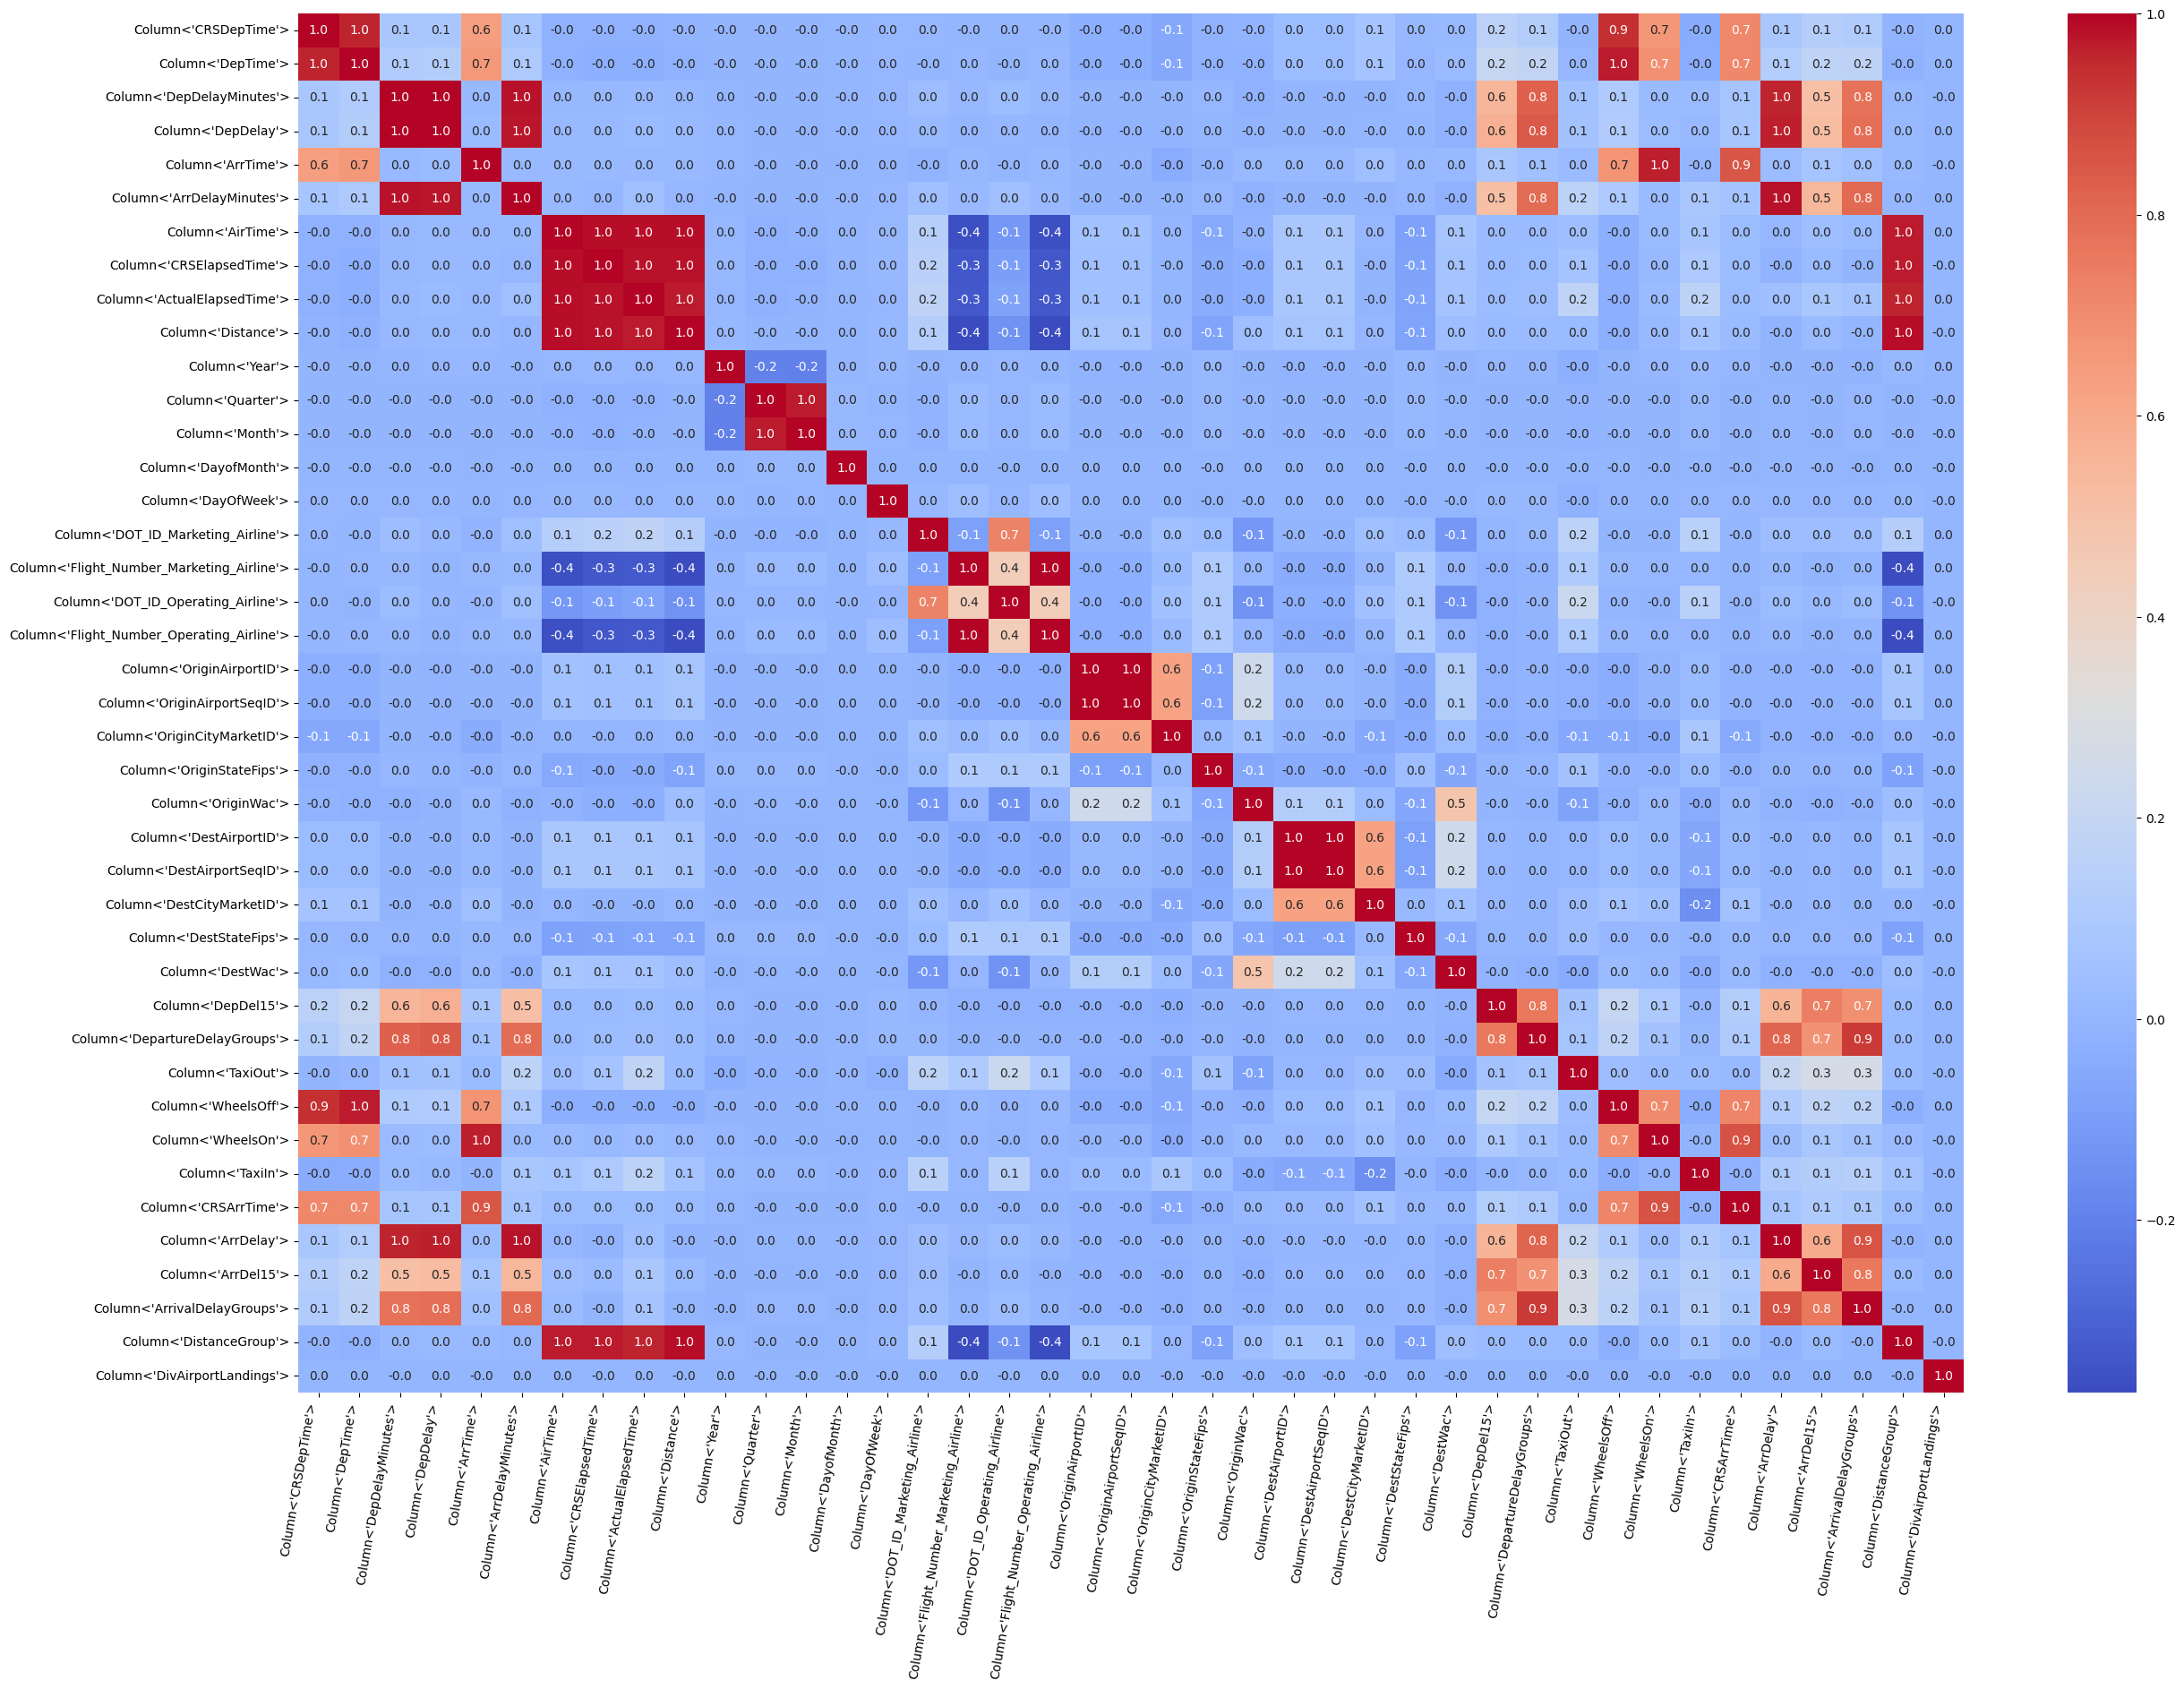

In [16]:
cols_corr = [str(c) for c in cols_corr]
df_plot = pd.DataFrame(data = corr_matrix, index=cols_corr, columns=cols_corr)
# Ajusta a largura da figura e a altura dos quadrados
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(df_plot, annot=True, cmap='coolwarm', fmt='.1f', ax=ax, square=False)

# Gira os rótulos do eixo x em 45 graus
plt.xticks(rotation=80, ha='right')

plt.show()

A nossa matriz de correlação tem a diagonal principal com valor igual a 1, como seria esperado. É de notar que existem valores 1.0 fora da diagonal principal. Isto aconteceu porque devido ao elevado número de variáveis em estudo tivemos que fazer arredondamentos com 1 casa decimal, para ser possível visualizar a matriz e as correlações entre variáveis.

In [17]:
# colunas que decidimos não trabalhar com
cols_to_drop = ["Flight_Number_Operating_Airline", 
                "DOT_ID_Operating_Airline",
                "OriginCityMarketID",
                "OriginStateFips",
                "OriginWac", # 0.5
                "DestCityMarketID",
                "DestStateFips",
                "DestWac",
                "TaxiOut",
                "TaxiIn",
                "CRSArrTime",
                "ArrivalDelayGroups",
                "DistanceGroup",
                "DivAirportLandings"
               ]

In [18]:
df_flights = df_flights.drop(*cols_to_drop)

In [19]:
df_flights.columns

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityName',
 'OriginState',
 'OriginStateName',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityName',
 'DestState',
 'DestStateName',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'WheelsOff',
 'WheelsOn',
 'ArrDelay',
 'ArrDel15',
 'ArrTimeBlk']

In [20]:
print("Número de linhas: ", df_flights.count(), "      ||   Número de colunas: ", len(df_flights.columns))

Número de linhas:  28339510       ||   Número de colunas:  47


Ficamos com apenas 47 variáveis.

## Outliers

In [21]:
def describe_numeric_cols_v2(df):
    numeric_cols = [col_name for col_name, col_type in df.dtypes if col_type in ('int', 'bigint', 'float', 'double') and col_name not in cols_to_drop]
    return df.select(numeric_cols).describe().toPandas().transpose()

describe_numeric_cols_v2(df_flights)

,0,1,2,3,4
summary,count,mean,stddev,min,max
CRSDepTime,28339510,1325.325672991523,482.13726468379053,1,2359
DepTime,28339510,1329.1465610732155,495.02063784174095,1.0,2400.0
DepDelayMinutes,28339510,12.71744522047135,45.99462337557187,0.0,7223.0
DepDelay,28339510,9.23847367156313,47.1014074905052,-1280.0,7223.0
ArrTime,28339510,1467.9771987941922,525.3428176051383,1.0,2400.0
ArrDelayMinutes,28339510,12.809567949481131,45.800916266798616,0.0,7232.0
AirTime,28339510,109.08952571868744,69.06773663431024,-1244.0,1557.0
CRSElapsedTime,28339510,138.95247405477372,70.93263371544134,-292.0,1645.0
ActualElapsedTime,28339510,133.3200603327298,70.77064316430183,-1228.0,1604.0


Notamos que a variável AirTime assumia valores negativos, o que não é possível considerando o contexto e a descrição da variável. Deste modo, fomos ver em que situações em que tal acontecia. Tal como se pode ver pelo valor abaixo, apenas aconteceu uma vez.

In [22]:
df_flights.filter(F.col("AirTime") < 0).count()

1

**Dados incongruentes**

In [23]:
df_flights.filter(F.col("AirTime") < 0).show(vertical=True)

-RECORD 0-------------------------------------------------------
 FlightDate                              | 2018-01-16 00:00:00  
 Airline                                 | Compass Airlines     
 Origin                                  | SEA                  
 Dest                                    | PSC                  
 Cancelled                               | false                
 Diverted                                | false                
 CRSDepTime                              | 2240                 
 DepTime                                 | 120.0                
 DepDelayMinutes                         | 0.0                  
 DepDelay                                | -1280.0              
 ArrTime                                 | 212.0                
 ArrDelayMinutes                         | 0.0                  
 AirTime                                 | -1244.0              
 CRSElapsedTime                          | 62.0                 
 ActualElapsedTime       

Decidimos eliminar essa linha, considerando que apenas essa tinha problemas deste tipo e considerando o elevado número de dados não implicaria grande perdad de informação.

In [24]:
df_flights = df_flights.filter(F.col("AirTime") >= 0).drop()

In [26]:
print("Número de linhas: ", df_flights.count(), "      ||   Número de colunas: ", len(df_flights.columns))

Número de linhas:  28339509       ||   Número de colunas:  47


No final, ficamos com 28339509 linhas e 47 colunas.

## Criação de ficheiro parquet com os dados mais limpos

A criação deste ficheiro foi uma decisão estratégica, que nos permitiu fazer os próximos passos de forma mais rápida e eficiente, uma vez que o tempo computacional diminuiu, devido às características inerentes aos ficheiros parquet e a todo o tratamento e limpeza efetuados até aqui.

In [29]:
df = df_flights
df.coalesce(1).write.format('parquet').save('flights_clean.parquet')